In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plan prosty z 2 poziomami

In [2]:
df = pd.read_excel('exp_2.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      24 non-null     int64 
 1   factor  24 non-null     object
 2   dv      24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


In [3]:
df.head()

,id,factor,dv
0,1,a,5
1,2,a,4
2,3,a,6
3,4,a,5
4,5,a,4


In [4]:
df.groupby('factor').dv.mean()

factor
a    5.000000
b    2.166667
Name: dv, dtype: float64

In [5]:
df.groupby('factor').dv.std()

factor
a    0.738549
b    1.403459
Name: dv, dtype: float64

In [6]:
st = df.groupby('factor').dv.describe()
st.round(2)

,count,mean,std,min,25%,50%,75%,max
factor,,,,,,,,
a,12.0,5.00,0.74,4.0,4.75,5.0,5.25,6.0
b,12.0,2.17,1.40,1.0,1.00,2.0,2.25,6.0


Średnia wartość **zmiennej zależnej** w grupie **a** wyniosła _M_ = 5,00 (_SD_ = 0,74). Średnia wartość **zmiennej zależnej** w grupie **b** wyniosła _M_ = 5,00 (_SD_ = 0,74). W grupie **b** **zmienna zależna** miała niższą wartość niż w grupie **a.** Zależności pomiędzy grupami w **zmiennej zależnej** prezentuje Rycina 1.

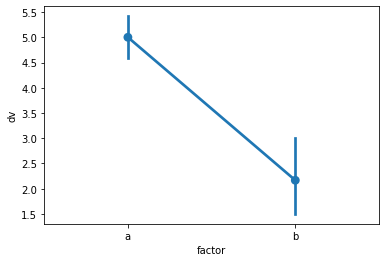

In [7]:
sns.pointplot(x='factor', y='dv', data=df)

W powyższym wykresie wąsy oznaczają 95% przedział ufności dla średniej. To jest optymalna wizualizacja. Jeżeli nie potrafimy wyliczyć 95% przedziału ufności, obliczmy błąd standardowy średniej (_SEM_):

$$SEM = \frac{SD}{\sqrt{N}}$$

In [8]:
st['std'] / np.sqrt(st['count'])

factor
a    0.213201
b    0.405144
dtype: float64

# Plan prosty z 3 poziomami

In [9]:
df = pd.read_excel('exp_3.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      36 non-null     int64 
 1   factor  36 non-null     object
 2   dv      36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [10]:
df.head()

,id,factor,dv
0,1,a,5
1,2,a,4
2,3,a,6
3,4,a,5
4,5,a,4


In [11]:
df.groupby('factor').dv.mean()

factor
a    5.000000
b    2.166667
c    5.000000
Name: dv, dtype: float64

In [12]:
df.groupby('factor').dv.std()

factor
a    0.738549
b    1.403459
c    0.603023
Name: dv, dtype: float64

In [13]:
st = df.groupby('factor').dv.describe()
st

,count,mean,std,min,25%,50%,75%,max
factor,,,,,,,,
a,12.0,5.000000,0.738549,4.0,4.75,5.0,5.25,6.0
b,12.0,2.166667,1.403459,1.0,1.00,2.0,2.25,6.0
c,12.0,5.000000,0.603023,4.0,5.00,5.0,5.00,6.0


In [14]:
st['std'] / np.sqrt(st['count'])

factor
a    0.213201
b    0.405144
c    0.174078
dtype: float64

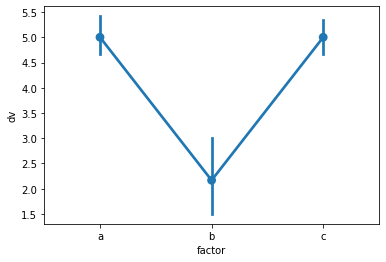

In [15]:
sns.pointplot(x='factor', y='dv', data=df)

# Plan złożony 2x2

In [16]:
df_2x2 = pd.read_excel('exp_2x2.xlsx')
df_2x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        48 non-null     int64 
 1   factor_1  48 non-null     object
 2   factor_2  48 non-null     object
 3   rt        48 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


In [17]:
df_2x2.head()

,id,factor_1,factor_2,rt
0,1,a,x,2
1,2,a,x,4
2,3,a,x,6
3,4,a,x,5
4,5,a,x,4


In [21]:
st = df_2x2.groupby(['factor_1', 'factor_2']).rt.describe()
st.round(2)

count  mean   std  min   25%  50%   75%  max
factor_1 factor_2                                              
a        x          12.0  4.75  1.14  2.0  4.00  5.0  5.25  6.0
         y          12.0  4.75  0.75  4.0  4.00  5.0  5.00  6.0
b        x          12.0  2.17  1.40  1.0  1.00  2.0  2.25  6.0
         y          12.0  4.25  1.54  1.0  3.75  5.0  5.00  6.0

In [19]:
st['std'] / np.sqrt(st['count'])

factor_1  factor_2
a         x           0.328564
          y           0.217597
b         x           0.405144
          y           0.445941
dtype: float64

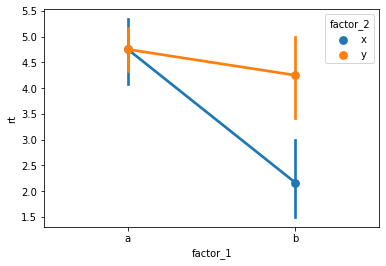

In [20]:
sns.pointplot(x='factor_1', y='rt', hue='factor_2', data=df_2x2)

Zaobserwowano efekt główny czynnika1 oraz interakcję czynnika1 z czynnikiem2. Nie zaobserwowano efektu głównego czynnika2. 